In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Counting the number of each category in 'custcat' column.

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

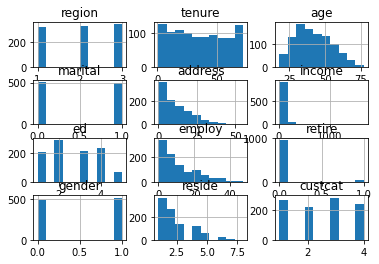

In [4]:
df.hist()
plt.show()

scikit learn doesn't work with pandas library. Its input should be a "numpy array"; So we should convert our data to numpy arrays, as it's shown bellow.

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
X = np.array(df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
                 'employ', 'retire', 'gender', 'reside']])
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

np.array(df[['column', 'column', ...]] = df[['column', 'column', ...]].values

In [7]:
Y = np.array(df[['custcat']])
Y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]], dtype=int64)

In [8]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print("train shape:", X_train.shape, Y_train.shape)
print("test shape:", X_test.shape, Y_test.shape)

train shape: (800, 11) (800, 1)
test shape: (200, 11) (200, 1)


In [10]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
neighbors = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
neighbors

C:\Users\rohani.sara\Miniconda3\envs\condaenv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [11]:
Y_ = neighbors.predict(X_test)
print(Y_[0:5])
print(Y_test[0:5])

[1 1 3 2 4]
[[4]
 [1]
 [1]
 [2]
 [4]]


In [12]:
from sklearn.metrics import accuracy_score

print("Train set accuracy:", accuracy_score(y_true=Y_train, y_pred=neighbors.predict(X_train)))
print("Test set accuracy:", accuracy_score(y_true=Y_test, y_pred=Y_))

Train set accuracy: 0.5475
Test set accuracy: 0.32


In [13]:
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    nei = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
    Y_ = nei.predict(X_test)
    mean_acc[n - 1] = accuracy_score(y_true=Y_test, y_pred=Y_)
    std_acc[n - 1] = np.std(Y_ == Y_test) / np.sqrt(Y_.shape[0])
print(mean_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]


C:\Users\rohani.sara\Miniconda3\envs\condaenv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rohani.sara\Miniconda3\envs\condaenv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rohani.sara\Miniconda3\envs\condaenv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rohani.sara\Miniconda3\envs\condaenv\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vect

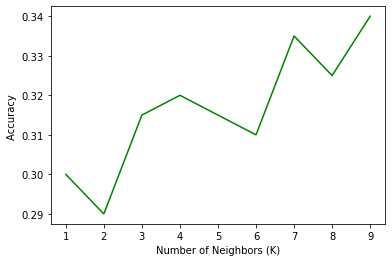

In [14]:
plt.plot(range(1, Ks), mean_acc, 'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()